# PLOT

In [1]:
import numpy as np
import pandas as pd
import sqlite3

import plotnine as p9
from mizani.breaks import date_breaks
from mizani.formatters import date_format, dollar_format

In [2]:
con = sqlite3.connect('market.db')

### PLOT DOW

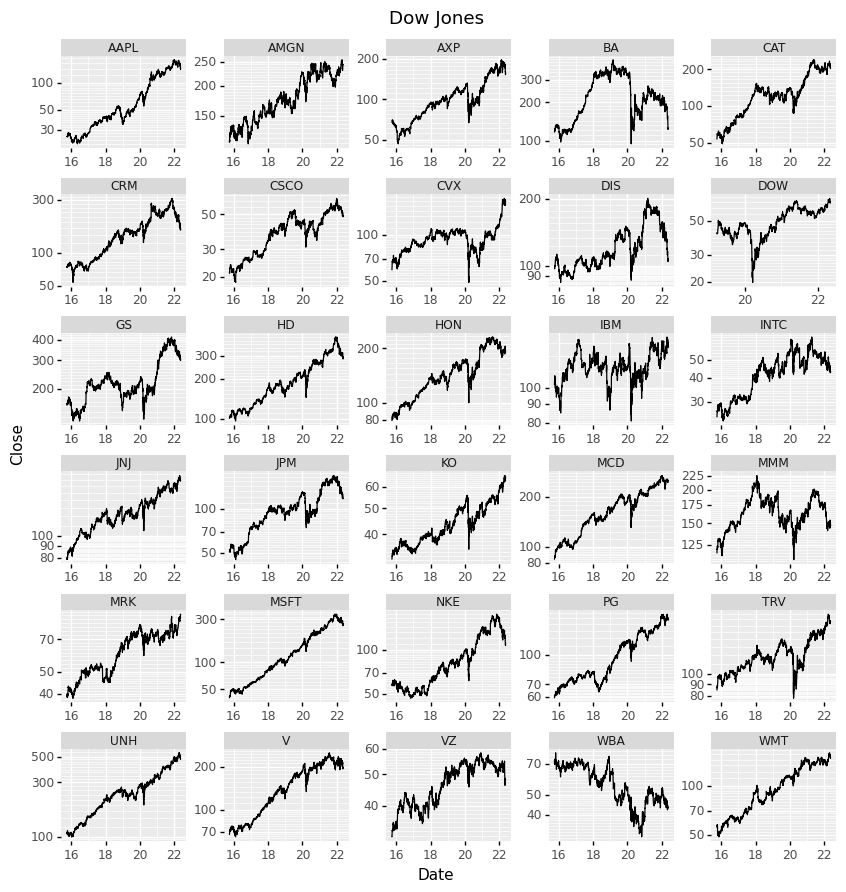

<ggplot: (8773214107185)>

In [3]:
df = pd.read_sql('''
    SELECT Date, Symbol, Adj_Close AS Close
    FROM tidy_histories
    WHERE Date >= '2015-1-1' AND Symbol IN (
        SELECT Symbol
        FROM dow_table) 
    ''', con, parse_dates=['Date'])

width = 10
ncol = 5
nrow = np.ceil(len(df['Symbol'].unique())/ncol)

p = (p9.ggplot(df)
    + p9.theme(figure_size=(width, 0.85*width/ncol*nrow))
    + p9.scale_x_datetime(breaks=date_breaks('2 years'), labels=date_format('%y'))
    + p9.geom_line(mapping=p9.aes(x='Date', y='Close'))
    + p9.scale_y_log10()
    + p9.facet_wrap('Symbol', ncol=ncol, scales='free')
    + p9.theme(subplots_adjust={'hspace': 0.50, 'wspace': 0.30})
    + p9.ggtitle("Dow Jones"))

display(p)

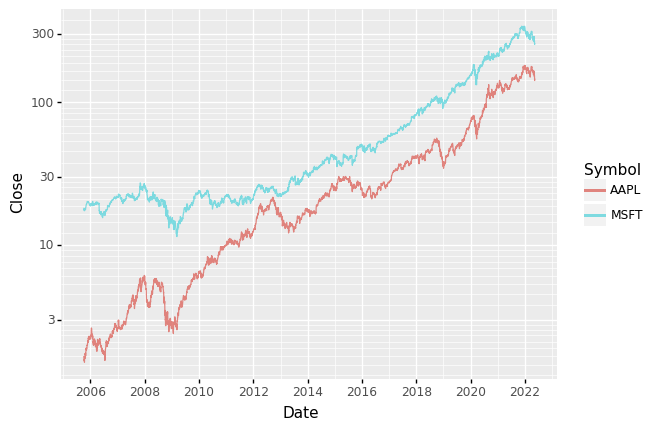

<ggplot: (8773226348788)>

In [4]:
df = pd.read_sql('''
    SELECT Date, Symbol, Adj_Close AS Close
    FROM tidy_histories
    WHERE Date >= '2005-1-1' AND Symbol IN ('AAPL', 'MSFT')
    ''', con, parse_dates=['Date'])

p = (p9.ggplot(data=df, mapping=p9.aes(x='Date', y='Close', color='Symbol'))
    + p9.geom_line(alpha=0.75)
    + p9.scale_y_log10()
    + p9.scale_x_datetime(breaks=date_breaks('2 year'), labels=date_format('%Y')))

display(p)

### PLOT S&P 500

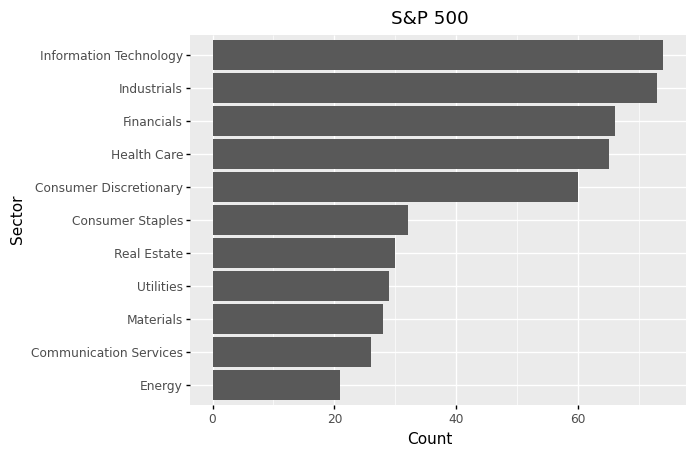

<ggplot: (8773226367600)>

In [5]:
df = pd.read_sql('''
    SELECT Sector, COUNT(Sector) AS Count
    FROM sp5_table
    GROUP BY Sector
    ORDER BY Count DESC
    ''', con)

p = (p9.ggplot(df)
    + p9.geom_bar(mapping=p9.aes(x='Sector', y='Count'), stat='identity')
    + p9.coord_flip()
    + p9.scale_x_discrete(limits=df['Sector'].values[::-1])
    + p9.ggtitle('S&P 500'))

display(p)

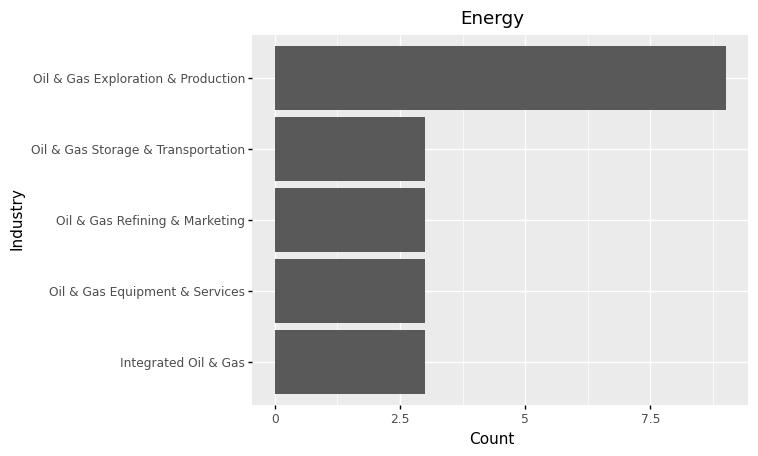

<ggplot: (8773226480481)>

In [6]:
sector = 'Energy'
# sector = 'Health Care'

df = pd.read_sql(f'''
    SELECT Industry, COUNT(Industry) AS Count
    FROM sp5_table
    WHERE Sector = '{sector}'
    GROUP BY Industry
    ORDER BY Count DESC
    ''', con)

p = (p9.ggplot(df)
    + p9.geom_bar(mapping=p9.aes(x='Industry', y='Count'), stat='identity')
    + p9.coord_flip()
    + p9.scale_x_discrete(limits=df['Industry'].values[::-1])
    + p9.ggtitle(sector))

display(p)

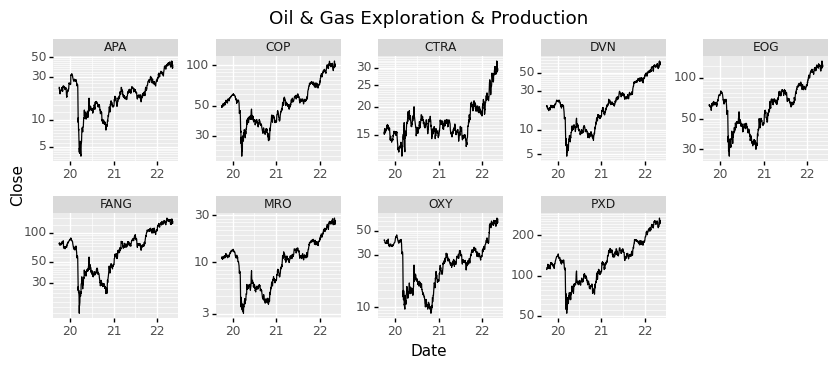

<ggplot: (8773215633987)>

,Symbol,Name
0,APA,APA Corporation
1,COP,ConocoPhillips
2,CTRA,Coterra
3,DVN,Devon
4,FANG,Diamondback
5,EOG,EOG Resources
6,MRO,Marathon Oil
7,OXY,Occidental Petroleum
8,PXD,Pioneer Natural Resources


In [7]:
industry = 'Oil & Gas Exploration & Production'
# industry = 'Pharmaceuticals'

df = pd.read_sql('''
    SELECT Date, Symbol, Adj_Close AS Close
    FROM tidy_histories
    WHERE Date >= '2019-1-1' AND Symbol IN (
        SELECT Symbol
        FROM sp5_table
        WHERE Industry = ?) 
    ''', con, params=(industry,), parse_dates=['Date'])

width = 10
ncol = 5
nrow = np.ceil(len(df['Symbol'].unique())/ncol)

p = (p9.ggplot(df)
    + p9.theme(figure_size=(width, 0.85*width/ncol*nrow))
    + p9.scale_x_datetime(breaks=date_breaks('1 year'), labels=date_format('%y'))
    + p9.geom_line(mapping=p9.aes(x='Date', y='Close'))
    + p9.scale_y_log10()
    + p9.facet_wrap('Symbol', ncol=ncol, scales='free')
    + p9.theme(subplots_adjust={'hspace': 0.50, 'wspace': 0.30})
    + p9.ggtitle(industry))

display(p)

df = pd.read_sql(f'''
    SELECT Symbol, Name
    FROM sp5_table
    WHERE Industry = ?
    ''', con, params=(industry,))

display(df)

### PLOT ETFs

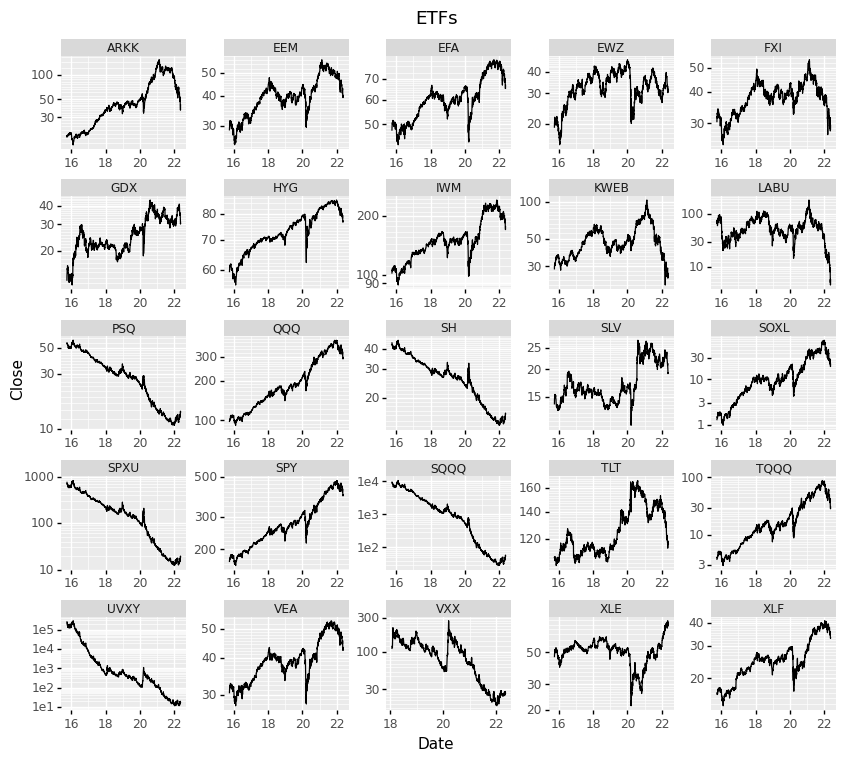

<ggplot: (8773226815470)>

In [8]:
df = pd.read_sql('''
    SELECT Date, Symbol, Adj_Close AS Close
    FROM tidy_histories
    WHERE Date >= '2015-1-1' AND Symbol IN (
        SELECT Symbol
        FROM etf_table
        LIMIT 25) 
    ''', con, parse_dates=['Date'])

width = 10
ncol = 5
nrow = np.ceil(len(df['Symbol'].unique())/ncol)

p = (p9.ggplot(df)
    + p9.theme(figure_size=(width, 0.85*width/ncol*nrow))
    + p9.scale_x_datetime(breaks=date_breaks('2 years'), labels=date_format('%y'))
    + p9.geom_line(mapping=p9.aes(x='Date', y='Close'))
    + p9.scale_y_log10()
    + p9.facet_wrap('Symbol', ncol=ncol, scales='free')
    + p9.theme(subplots_adjust={'hspace': 0.50, 'wspace': 0.30})
    + p9.ggtitle('ETFs'))

display(p)